In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import altair as alt
import scipy.stats as stats

In [3]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [5]:
# Read the data
df = pd.read_csv('data/transfers/top250.csv')
# Let's look at the last few results to see until which date the data is present
df.tail()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4695,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018-2019,5000000.0,4800000
4696,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018-2019,3000000.0,4800000
4697,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018-2019,8500000.0,4500000
4698,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,4500000.0,4500000
4699,Kyle Bartley,Centre-Back,27,Swansea,Championship,West Brom,Championship,2018-2019,3500000.0,4500000


In [14]:
df.shape

(4700, 10)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
Name            4700 non-null object
Position        4700 non-null object
Age             4700 non-null int64
Team_from       4700 non-null object
League_from     4700 non-null object
Team_to         4700 non-null object
League_to       4700 non-null object
Season          4700 non-null object
Market_value    3440 non-null float64
Transfer_fee    4700 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


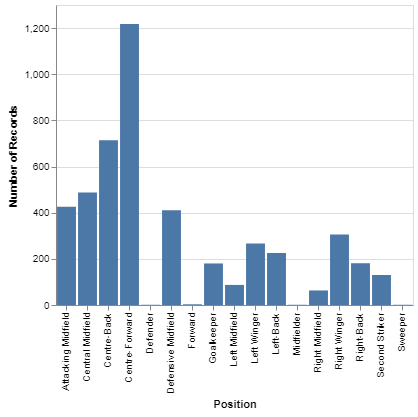

In [6]:
alt.Chart(df).mark_bar().encode(
    alt.X('Position:N'),
    alt.Y('count():Q'),
    #alt.Color('League_to')
)

In [7]:
df[df['Position']=='Defender']

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
652,Sergio Hellings,Defender,17,Ajax U19,U19 Eredivisie,Anderlecht U19,Belgium,2002-2003,NaN,2000000


In [17]:
df[df['Position']=='Forward']

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
188,Didier Martel,Forward,28,FC Utrecht,Eredivisie,Vitesse,Eredivisie,2000-2001,NaN,2750000
242,Patricio Camps,Forward,28,Vélez Sarsfield,Argentina,PAOK Saloniki,Super League,2000-2001,NaN,1850000
653,Mazhar Abdelrahman,Forward,25,El Masry,Premier League,Monaco,Ligue 1,2002-2003,NaN,2000000


In [19]:
lastseason = df[df['Season']=='2018-2019']
lastseason.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4455,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120000000.0,135000000
4456,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100000000.0,117000000
4457,Thomas Lemar,Left Winger,22,Monaco,Ligue 1,Atlético Madrid,LaLiga,2018-2019,65000000.0,70000000
4458,Riyad Mahrez,Right Winger,27,Leicester,Premier League,Man City,Premier League,2018-2019,50000000.0,67800000
4459,Alisson,Goalkeeper,25,AS Roma,Serie A,Liverpool,Premier League,2018-2019,60000000.0,62500000


In [48]:
lastseason.loc[lastseason['League_to']=='Série A', 'League_to']='Serie A'
lastseason.loc[lastseason['League_to']=='Premier Liga', 'League_to']='Russian Premier League'
lastseason.loc[lastseason['League_to']=='Super League', 'League_to']='Swiss Super League'
lastseason.loc[lastseason['League_to']=='Professional League', 'League_to']='Saudi Pro League'
lastseason.loc[lastseason['League_to']=='Liga NOS', 'League_to']='Portuguese Primeira Liga'


lastseason['League_to'].value_counts()

Serie A                   60
Premier League            50
LaLiga                    35
1.Bundesliga              33
Ligue 1                   16
Championship              11
Russian Premier League     8
Liga MX Apertura           7
Eredivisie                 6
Liga NOS                   4
Swiss Super League         4
Saudi Pro League           3
MLS                        2
Primera División           1
Serie B                    1
J1 League                  1
Premiership                1
UAE Gulf League            1
LaLiga2                    1
Name: League_to, dtype: int64

In [47]:
lastseason[lastseason['League_to']=='Professional League']

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4551,Djaniny,Centre-Forward,27,Santos Laguna,Liga MX Apertura,Ahli,Professional League,2018-2019,5000000.0,10240000
4583,Nordin Amrabat,Left Winger,31,Watford,Premier League,Nasr,Professional League,2018-2019,3000000.0,8500000
4682,Petros,Central Midfield,29,São Paulo,Série A,Nasr,Professional League,2018-2019,3000000.0,5000000


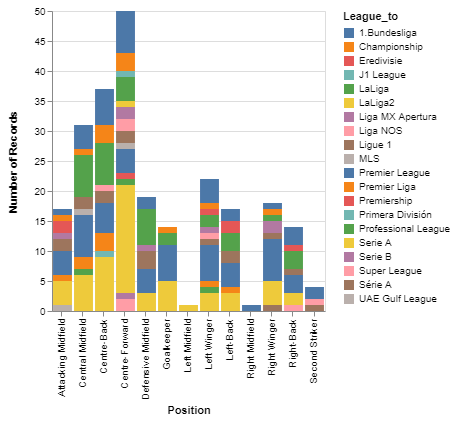

In [38]:
alt.Chart(lastseason).mark_bar().encode(
    alt.X('Position:N'),
    alt.Y('count():Q'),
    alt.Color('League_to')
)

In [22]:
lastseason[lastseason['League_to']=='UAE Gulf League']

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4644,Igor Coronado,Attacking Midfield,25,US Palermo,Serie B,Sharjah FC,UAE Gulf League,2018-2019,2400000.0,6000000


In [25]:
lastseason['League_to'].value_counts()

Serie A                58
Premier League         50
LaLiga                 35
1.Bundesliga           33
Ligue 1                16
Championship           11
Premier Liga            8
Liga MX Apertura        7
Eredivisie              6
Liga NOS                4
Super League            4
Professional League     3
MLS                     2
Série A                 2
Premiership             1
LaLiga2                 1
Primera División        1
Serie B                 1
J1 League               1
UAE Gulf League         1
Name: League_to, dtype: int64

In [27]:
lastseason[lastseason['League_to'].isin(['Premiership','LaLiga2','Primera División','Serie B','J1 League'])]

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
4550,Odsonne Edouard,Centre-Forward,20,Paris SG,Ligue 1,Celtic,Premiership,2018-2019,1500000.0,10300000
4642,Diego Rolan,Centre-Forward,25,G. Bordeaux,Ligue 1,Dep. La Coruña,LaLiga2,2018-2019,3500000.0,6000000
4664,Carlos Izquierdoz,Centre-Back,29,Santos Laguna,Liga MX Apertura,Boca Juniors,Primera División,2018-2019,3000000.0,5150000
4680,Fabrício,Centre-Forward,28,Portimonense,Liga NOS,Urawa Reds,J1 League,2018-2019,4000000.0,5000000
4686,Pietro Iemmello,Centre-Forward,26,Sassuolo,Serie A,Benevento,Serie B,2018-2019,2000000.0,5000000


In [31]:
lastseason_cleaner = lastseason.drop(lastseason[lastseason['League_to'].isin(['LaLiga2','Primera División','Serie B','J1 League'])].index)
lastseason_cleaner['League_to'].value_counts()

Serie A                58
Premier League         50
LaLiga                 35
1.Bundesliga           33
Ligue 1                16
Championship           11
Premier Liga            8
Liga MX Apertura        7
Eredivisie              6
Liga NOS                4
Super League            4
Professional League     3
Série A                 2
MLS                     2
UAE Gulf League         1
Premiership             1
Name: League_to, dtype: int64

c:\users\sarthak\documents\coding\soccerviz\env\lib\site-packages\altair\utils\core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


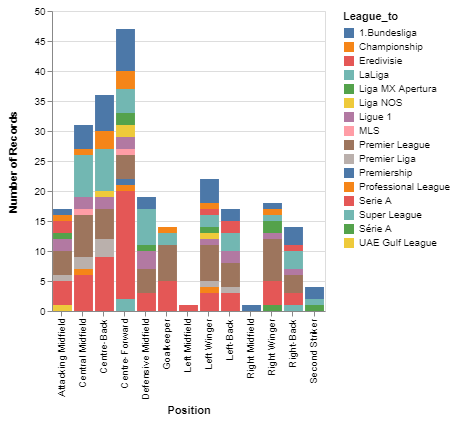

In [33]:
alt.Chart(lastseason_cleaner).mark_bar().encode(
    alt.X('Position:N'),
    alt.Y('count():Q'),
    alt.Color('League_to')
)